In [9]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
columns = ['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width']
columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [8]:
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(1)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0


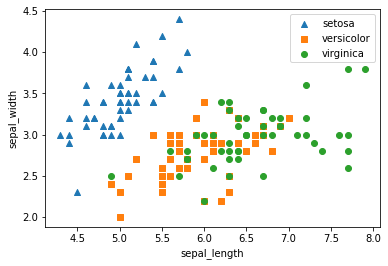

In [15]:
markers = ['^','s','o']
for i,marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data,y_axis_data,marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [18]:
np.round(iris_scaled.mean())

-0.0

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(2)
iris_pca = pca.fit_transform(iris_scaled)

In [21]:
iris_pca.shape

(150, 2)

In [25]:
pca_columns = ['pca1','pca2']

irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)


,pca1,pca2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


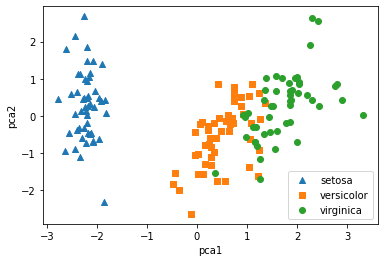

In [28]:
markers = ['^','s','o']
for i,marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

In [29]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [32]:
pca_X = irisDF_pca[['pca1','pca2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88
